In [1]:
import duckdb
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from anytree import RenderTree
from lib.tree_functions import import_tree_from_json
from lib.config import pipeline_name, db_name, tree_json_path
import tempfile
from lib import count_plot

base_url = "https://cdl-segg.fra1.cdn.digitaloceanspaces.com/cdl-segg/"

### Download Section Tree

In [2]:
tree_url = base_url + tree_json_path
response = requests.get(tree_url)
response.raise_for_status()
with tempfile.NamedTemporaryFile(delete=False, suffix=".json") as temp_file:
    temp_file.write(response.content)
    path = temp_file.name
    root_node = import_tree_from_json(path)

for pre, fill, node in RenderTree(root_node):
    print(f"{pre}{node.name} ({node.data_id })")

Pimp my School Downloads (36)
├── 1.1. Was ist Schülervertretungsarbeit (38)
├── 1.2. Rechtliche Grundlagen (39)
│   ├── Mecklenburg-Vorpommern (41)
│   ├── Besonderheiten an einzelnen Schulformen (42)
│   │   └── Oberstufenzentren (OSZ) (159)
│   ├── Nordrhein-Westfalen (52)
│   │   └── Erlasse (55)
│   ├── Sachsen-Anhalt (53)
│   ├── Berlin (56)
│   │   ├── Besonderheiten Berufsschulen (57)
│   │   ├── Formales für Gremien (58)
│   │   └── Schülervertretung in Bezirk und Land (59)
│   ├── Hessen (132)
│   └── Brandenburg (153)
├── 1.3. Mögliche Aktionen, Themen und Projekte von A-Z (46)
│   ├── Unterricht verändern (47)
│   ├── Projektideensammlungen zur Inspiration (111)
│   ├── Aktionen und Projekte (Beschreibungen) (51)
│   │   ├── Lesenacht (105)
│   │   ├── Party (106)
│   │   ├── Schulball (107)
│   │   ├── Schülernachhilfe-Pool (108)
│   │   ├── Valentinstag (109)
│   │   ├── Schülerfirma (160)
│   │   └── Veranstaltungen (110)
│   └── Klimaschutz & Nachhaltigkeit (161)
├

### Download Files

In [12]:
posts_url = base_url + "downloads.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

data_id,data_category_id,title,category_title,download_link,file_type
i64,i64,str,str,str,str
3900,86,"""Beurlaubung-Schüler_innen""","""Arbeitshilfen für Bezirksschu…","""https://meinsvwissen.de/downlo…","""pdf"""
4180,71,"""Vollversammlungen organisieren""","""3.4. Öffentlichkeitsarbeit""","""https://meinsvwissen.de/downlo…","""pdf"""
3878,64,"""Aktionsplaner""","""2.2. Einen guten Start gestalt…","""https://meinsvwissen.de/downlo…","""pdf"""
3879,64,"""Gestaltung von SV-Seminaren. M…","""2.2. Einen guten Start gestalt…","""https://meinsvwissen.de/downlo…","""pdf"""
3880,64,"""Was macht eine Schülervertretu…","""2.2. Einen guten Start gestalt…","""https://meinsvwissen.de/downlo…","""mp4"""


In [13]:
df["file_type"].value_counts().sort("count", descending=True)

file_type,count
str,u32
"""pdf""",32
"""octet-stream""",3
"""png""",3
"""mp4""",1
"""jpeg""",1


### Posts

In [3]:
posts_url = base_url + "posts.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

id,date,title,stage,tool_types,topics,download_chapter_dedicated,download_chapters_further,book_chapter,related_posts
i64,date,str,str,list[cat],list[str],i64,list[i64],str,list[i64]
6974,2023-06-04,"""Anträge""","""fortgeschrittene""","[""methode""]",[],null,[121],null,[]
6982,2023-06-04,"""Klassensprecher_innen""","""grundlagen""","[""praesentation""]","[""rechte""]",null,[39],null,"[3549, 5319, 3193]"
6198,2025-07-16,"""SV-Sitzungen""","""sv-alltag""","[""praesentation""]","[""ideenfindung"", ""motivation"", ""sitzungen""]",69,[69],"""https://meinsvwissen.de/wp-con…","[5304, 6198, … 4946]"
7303,2024-08-24,"""Schulkonferenz &#8211; Erklärv…","""grundlagen""","[""video""]","[""gremien"", ""rechte"", ""wahlen""]",null,[],null,"[7081, 5319, … 8395]"
7700,2025-06-29,"""Öffentlichkeitsarbeit der SV""","""sv-alltag""","[""infografik""]",[],71,[],null,"[7700, 6540, … 6760]"


In [4]:
df["stage"].value_counts().sort("count", descending=True)

stage,count
str,u32
"""grundlagen""",11
"""profis""",4
"""sv-alltag""",3
"""fortgeschrittene""",1
null,1


In [5]:
df["stage"].unique().to_list()

['profis', 'grundlagen', 'sv-alltag', None, 'fortgeschrittene']

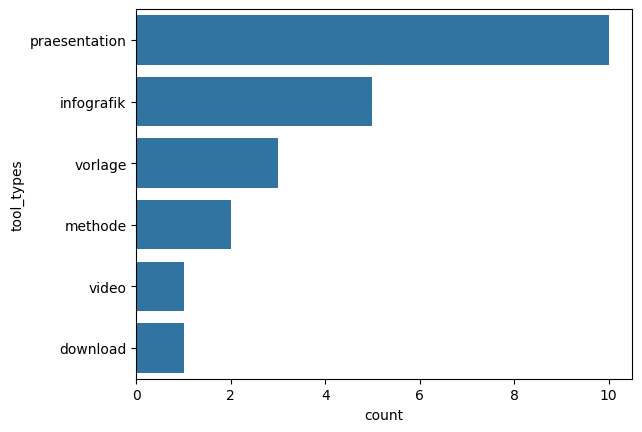

In [6]:
count_plot(df, "tool_types")

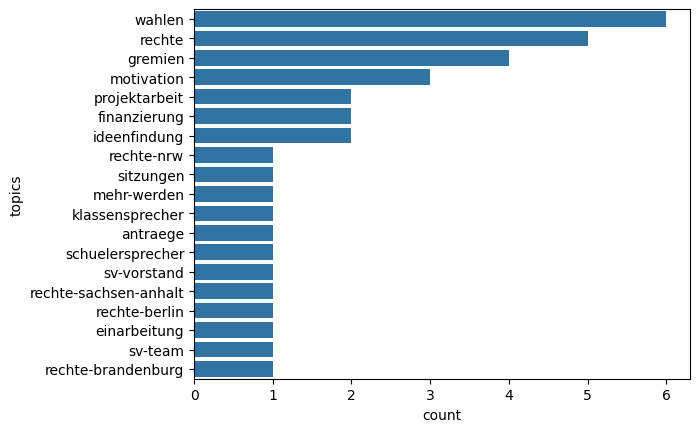

In [7]:
count_plot(df, "topics")

### Sections

In [8]:
posts_url = base_url + "sections.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

post_id,title,text,type,external_link
i64,str,str,cat,str
6198,null,"""Regelmäßige, gut strukturierte…","""plain_text""",null
6198,null,null,"""prezi""","""https://prezi.com/p/embed/4p3r…"
6987,null,"""Wir haben für euch Möglichkeit…","""plain_text""",null
6987,null,"""*Nutze die Pfeiltasten, um in …","""plain_text""",null
6987,null,null,"""prezi""","""https://prezi.com/p/embed/ChP2…"


In [11]:
df["type"].value_counts().sort("count", descending=True)

type,count
cat,u32
"""plain_text""",5
"""prezi""",3
"""accordion_section_text""",2
"""accordion_section_image""",1
"""image""",1


### Glossary Terms

In [14]:
posts_url = base_url + "glossary_terms.parquet"
response = requests.get(posts_url)
response.raise_for_status()
df = pl.read_parquet(response.content)
df.head()

term,definition,DE,DE_BW,DE_BY,DE_BE,DE_BB,DE_HB,DE_HH,DE_HE,DE_MV,DE_NI,DE_NW,DE_RP,DE_SL,DE_SN,DE_ST,DE_SH,DE_TH
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Antrag""","""Ein Antrag ist ein Vorschlag, …",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Aufgabenprofil""","""None""","""Ihr schreibt transparent und k…","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None""","""None"""
"""Auftaktveranstaltung / SV-Tag""","""Start in die SV-Arbeit zu Begi…","""Start in die SV-Arbeit zu Begi…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""Bezirks-/ Kreis & Landesschüle…",null,"""BSK (Bundesschülerkonferenz – …",null,null,"""BSA und LSA (Bezirksschüler- u…","""KSR und LSR (Kreisschüler- und…",null,null,null,"""KSR und LSR (Kreisschüler- und…",null,"""BSV und LSV (Bezirksschüler- u…",null,null,null,"""KSR und LSR (Kreisschüler- und…",null,"""Kreisschülersprecher:innen und…"
"""BSK""","""Bundesschülerkonferenz. Sie be…","""Bundesschülerkonferenz. Sie be…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
